### Importing Packages

In [1]:
# for Data Analysis
import pandas as pd
import numpy as np

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# for Data pre-processing
# !pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
#!pip install xgboost
from xgboost import XGBClassifier
#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Dataset Balancing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
# Model Saving 
import joblib
from joblib import dump



## Loading the dataset

In [2]:
data = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Documents\PERSONAL\10ALYTICS\PYTHON PROJECT\diabetes_prediction_dataset.csv")

In [3]:
data.head(6)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0


## Exploring the Dataset to understand it

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


We can observe from the we have columns with (Object(2), Int(4),Float(3))

## checking for Empty or Nullvalue

In [5]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

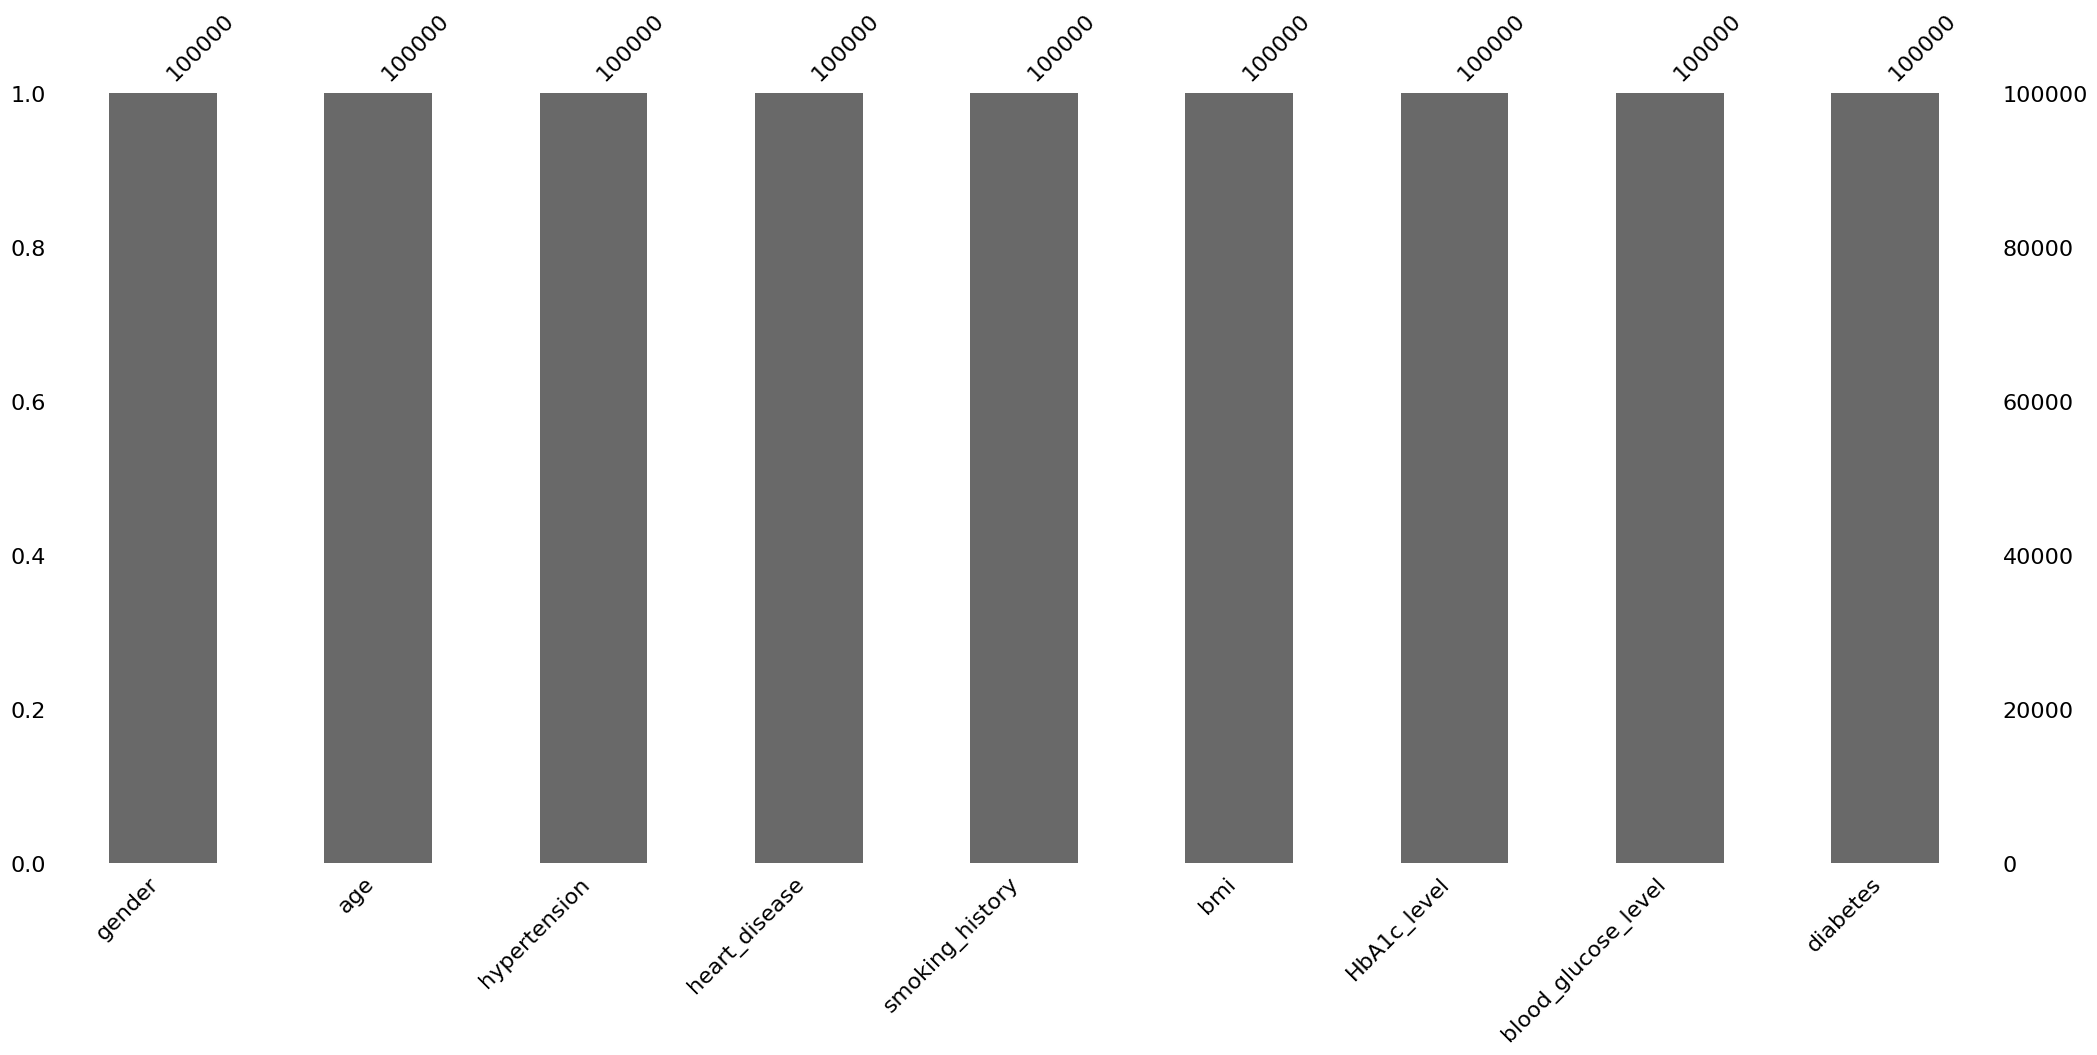

In [6]:
# Vissiualizing the missing values
msno.bar(data)
plt.show()


From the analysis we have no missing values in the dataset

## carrrying out Univarint analysis of the (Diabetes) column ie the outcome

diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64
diabetes
0    91500
1     8500
Name: count, dtype: int64


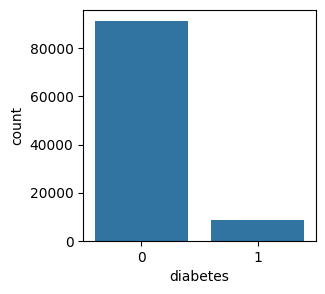

In [7]:
# Ploting the target feature for understanding
plt.figure(figsize=(3,3))
sns.countplot(x=data["diabetes"])
percentage = print(data["diabetes"].value_counts(normalize=True) * 100)
print(data["diabetes"].value_counts())

####  We observe that more patient without diabetes(91.4%) than those with diabetes(8.5%) 
####  signifying imbalance in our dataset that may impact out analysis. 

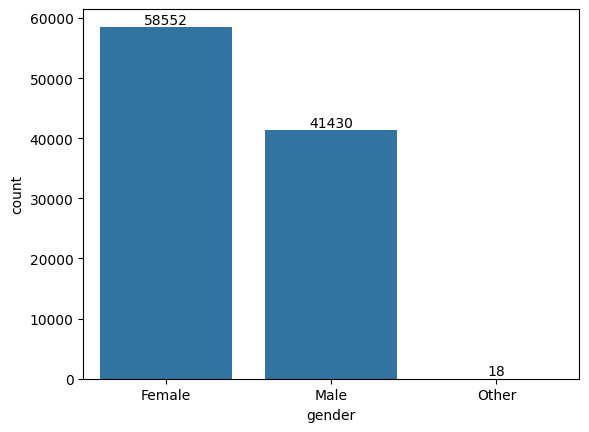

In [8]:
# checking the gender column
ax=sns.countplot(x='gender',data=data)
ax.bar_label(ax.containers[0])
plt.show()


##### We observe 3 gender categories, with more female patients data from the dataset

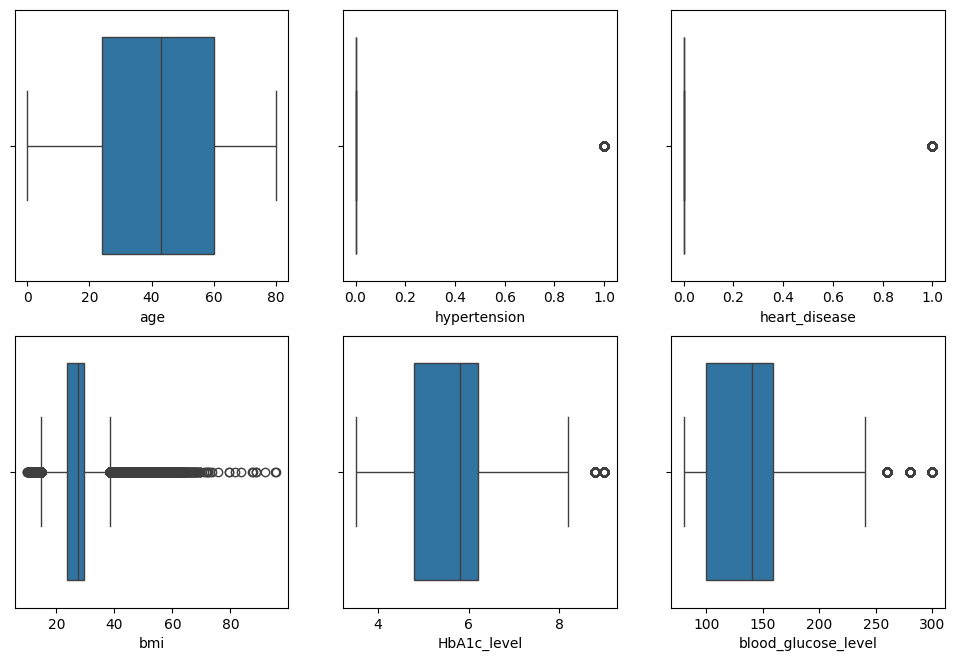

In [9]:
# Invetigating the dataset for outlier
plt.figure(figsize=(12, 12))

for i, col in enumerate(['age', 'hypertension', 'heart_disease', 
               'bmi', 'HbA1c_level', 'blood_glucose_level']):
    plt.subplot(3,3, i + 1)
    sns.boxplot(x = col, data = data)
plt.show()


We can observe the dataset distribution aroun age (20,40), with one outliers patient surring from heart_diease and hypertension

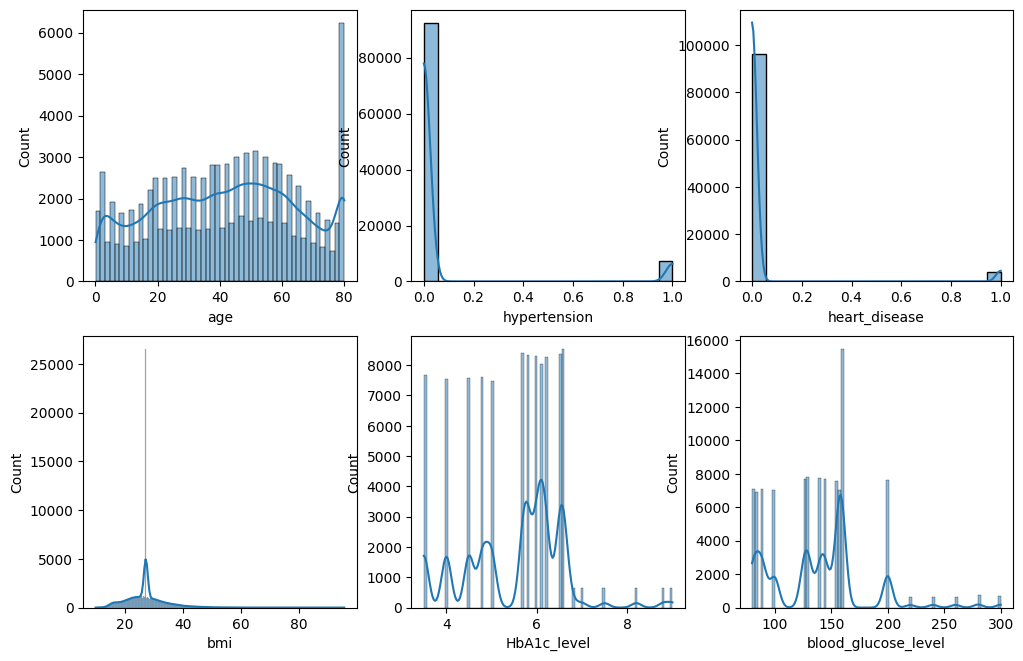

In [10]:
# Invetigating the dataset distribution
plt.figure(figsize=(12, 12))

for i, col in enumerate(['age', 'hypertension', 'heart_disease', 
               'bmi', 'HbA1c_level', 'blood_glucose_level']):
    plt.subplot(3,3, i + 1)
    sns.histplot(x = col, data = data, kde=True)
plt.show()

Observing that the data is more skewed towards the right in distribution across varrios features

Text(0.5, 1.0, 'Total Patient with diabetes by gender category')

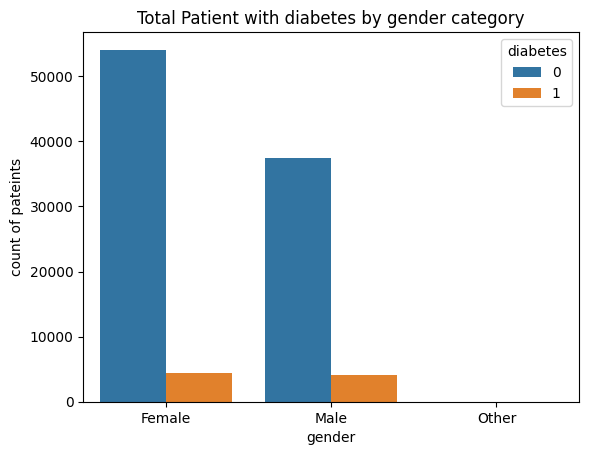

In [11]:
# Invetiagting the target against the Age
sns.countplot(x = 'gender', data=data,  hue = 'diabetes')
plt.xlabel('gender')
plt.ylabel('count of pateints')
plt.title('Total Patient with diabetes by gender category')


In [12]:
# Investigating depeer to understand why the no data for the other category
pivot_table = data.groupby(['gender', 'diabetes']).size().unstack(fill_value=0)
print(pivot_table)


diabetes      0     1
gender               
Female    54091  4461
Male      37391  4039
Other        18     0


In [13]:
# Dropping the 'Other' category in the gender column
# Reason: The 'Other' category contains only 18 records out of over 100k
# representing approximately 0.017% of the dataset. Additionally, none of these
# entries are associated with diabetes. Due to this extremely small representation
# and lack of outcome variability, the category is statistically insignificant.
# It is removed to simplify analysis and avoid model instability.

data = data[data['gender'].isin(['Male', 'Female'])]


Text(0.5, 1.0, 'Total Patient with diabetes by gender category')

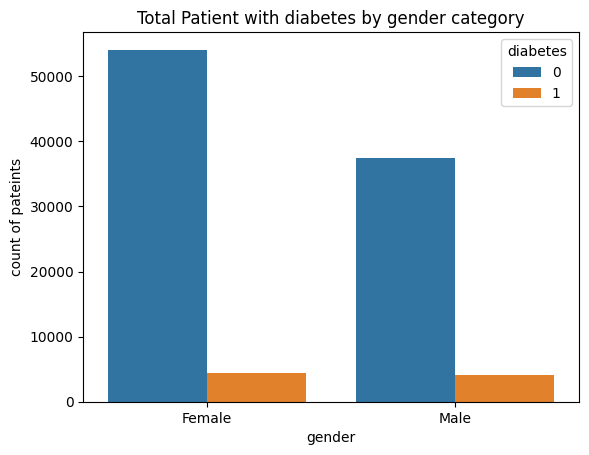

In [14]:
# Invetiagting the target against the Age
sns.countplot(x = 'gender', data=data,  hue = 'diabetes')
plt.xlabel('gender')
plt.ylabel('count of pateints')
plt.title('Total Patient with diabetes by gender category')

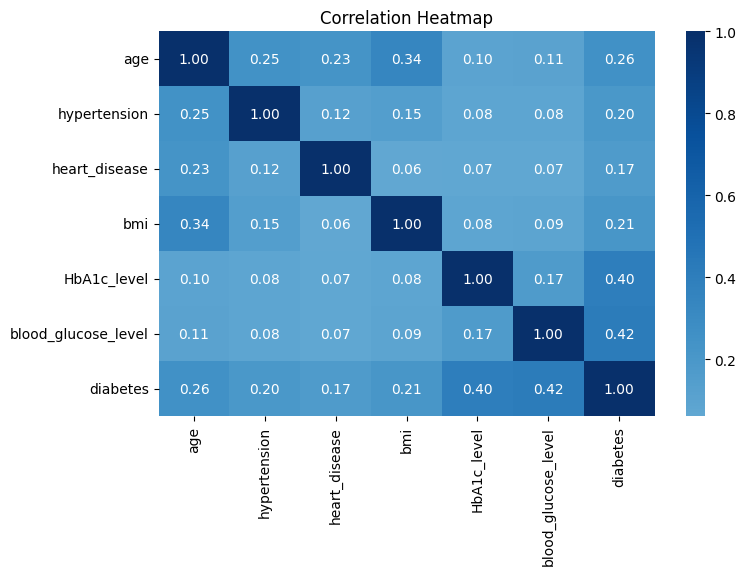

In [15]:
# Investigating the variable relationships
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(numeric_only=True), cmap='Blues', center=0, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


##### We observe a strong positive relationship involving the age variable in the correlation heatmap. However, since object-type columns such as smoking_history and gender are non-numeric, they were excluded from the correlation analysis. This limits our ability to fully assess their relationship with the target variable (diabetes). To address this, we need to transform the categorical variables into numerical format (e.g., using label encoding or one-hot encoding) so we can better understand their correlation with diabetes.

## Encoding categorical variables
#### Using Label Encoding

In [16]:
#diplay the categorical or object data 
categorical_data = data.select_dtypes(include=['object', 'category'])
categorical_data.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# Creating an instance for the encoder and using thr transfor method to encode the data
encoder = LabelEncoder()

In [19]:
for column_name in categorical_data:
    data[column_name] = encoder.fit_transform(data[column_name])

data.head()

    

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


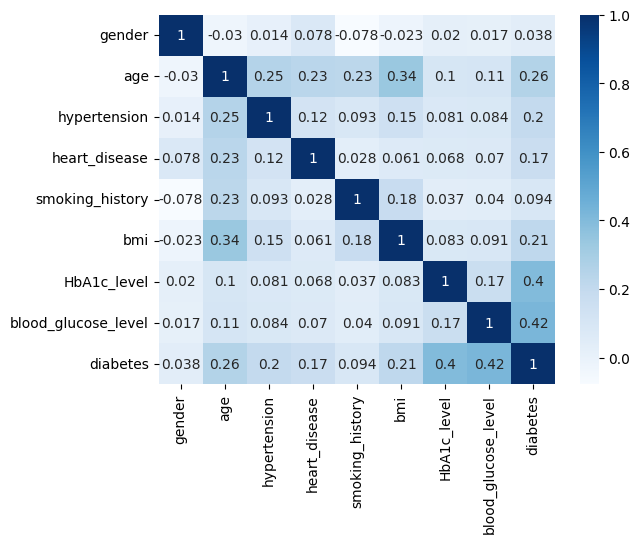

In [20]:
# Investigating the variable relationships
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

##### We still observe a strong positive relationship between the age and the posibility of patinet having diabetes.

## DATA PRE-PROCESSING and Modeling Approach


Having observed that our dataset is a little bit bias and which we may affect our model accuracy, am going apply these steps in my modeling.

Split original imbalanced dataset

Train 4 models (LogReg, Random Forest, XGBoost, Naive Bayes)

Print evaluation table & confusion matrices

Analyze imbalance effects

Balance the dataset using:

SMOTE

Scaling

Hyperparameter tuning

Data distribution checks

Repeat training & evaluation

Compare before vs after

Then Save my trained models

In [21]:
# Splitting the dataset into dependent and independednt features

In [22]:
label = data["diabetes"] # target feature
features = data.drop("diabetes", axis=1) # Independent features


In [23]:
features.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [24]:
label.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

## Data splitting and Feature scaling

### Splitting the data into training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [26]:
len(X_train) == len(y_train)

True

In [27]:
X_train.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
48062,1,14.0,0,0,0,27.32,4.8,200
38243,1,3.0,0,0,0,19.99,6.1,130
3806,1,51.0,0,0,4,27.32,7.0,130


## STEP 4: MODEL TRAINNINGS


### Logistics Regression Model Training

In [28]:
# Model Initialization
model = LogisticRegression(random_state=42)

In [29]:
# Model training using the train data_sets
model.fit(X_train,y_train)

C:\Users\LENOVO\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [30]:
# Prediction Making for x_test and 
prediction = model.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], shape=(19997,))

In [31]:
y_test.values

array([0, 0, 0, ..., 0, 1, 0], shape=(19997,))

### Model Evaluation

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, prediction, digits=5)
matrix = confusion_matrix(y_test, prediction)

In [33]:
y_train.value_counts()

diabetes
0    73260
1     6725
Name: count, dtype: int64

In [34]:
y_test.value_counts()

diabetes
0    18222
1     1775
Name: count, dtype: int64

##### Observe that the model is 95%, with more better prediction on the people without diabetes due to our Dataset biasness.

C:\Users\LENOVO\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:00:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


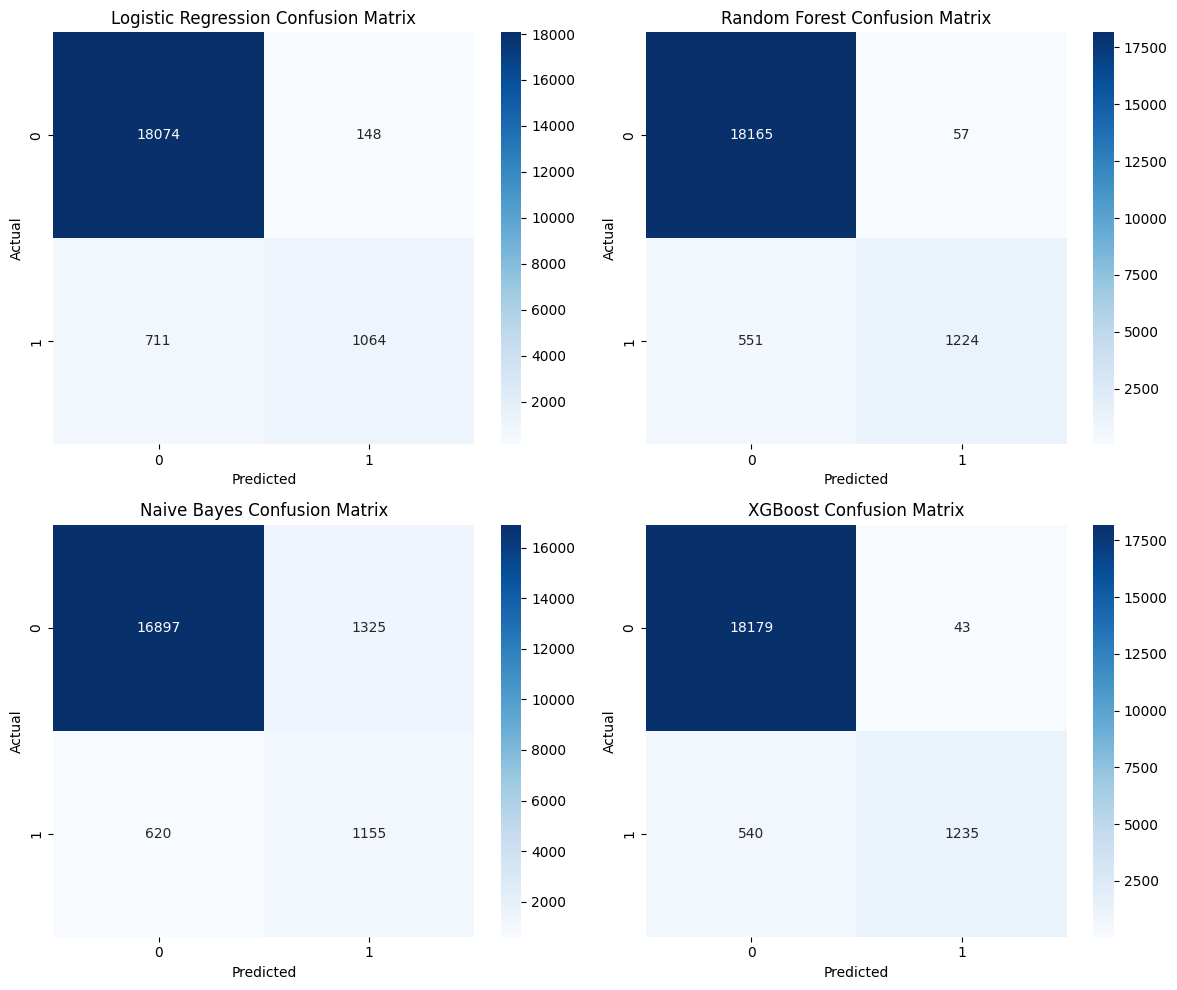

Classification Summary Table:
              Model  Precision (0)  Recall (0)  F1-score (0)  Precision (1)  Recall (1)  F1-score (1)  Accuracy
Logistic Regression           0.96        0.99          0.98           0.88        0.60          0.71      0.96
      Random Forest           0.97        1.00          0.98           0.96        0.69          0.80      0.97
        Naive Bayes           0.96        0.93          0.95           0.47        0.65          0.54      0.90
            XGBoost           0.97        1.00          0.98           0.97        0.70          0.81      0.97


In [35]:
# Classifiers list
classifiers = [
    [LogisticRegression(random_state=42), 'Logistic Regression'],
    [RandomForestClassifier(random_state=42), 'Random Forest'],
    [GaussianNB(), 'Naive Bayes'],
    [XGBClassifier(eval_metric='mlogloss', use_label_encoder=False), 'XGBoost']
]

# To collect report data
report_table = []

# For confusion matrix plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid

for idx, (model, model_name) in enumerate(classifiers):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Classification report as dict
    report_dict = classification_report(y_test, predictions, output_dict=True)
    
    # Extract only class "0", class "1", and "accuracy"
    row = {
        'Model': model_name,
        'Precision (0)': round(report_dict['0']['precision'], 2),
        'Recall (0)': round(report_dict['0']['recall'], 2),
        'F1-score (0)': round(report_dict['0']['f1-score'], 2),
        'Precision (1)': round(report_dict['1']['precision'], 2),
        'Recall (1)': round(report_dict['1']['recall'], 2),
        'F1-score (1)': round(report_dict['1']['f1-score'], 2),
        'Accuracy': round(report_dict['accuracy'], 2)
    }
    report_table.append(row)

    # Confusion matrix plot
    matrix = confusion_matrix(y_test, predictions)
    ax = axes[idx // 2, idx % 2]
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print classification report table
report_df = pd.DataFrame(report_table)
print("Classification Summary Table:")
print(report_df.to_string(index=False))


##### XGBoost is the top model with 97% accuracy and 70% diabetic recall.
##### Naive Bayes is not recommended due to low diabetic precision (47%).
##### High accuracy models still miss diabetic cases due to data imbalance.
##### Using Standard Scaler and SMOTE can help improve detection of diabetic patients.

#### Scaling our dataset

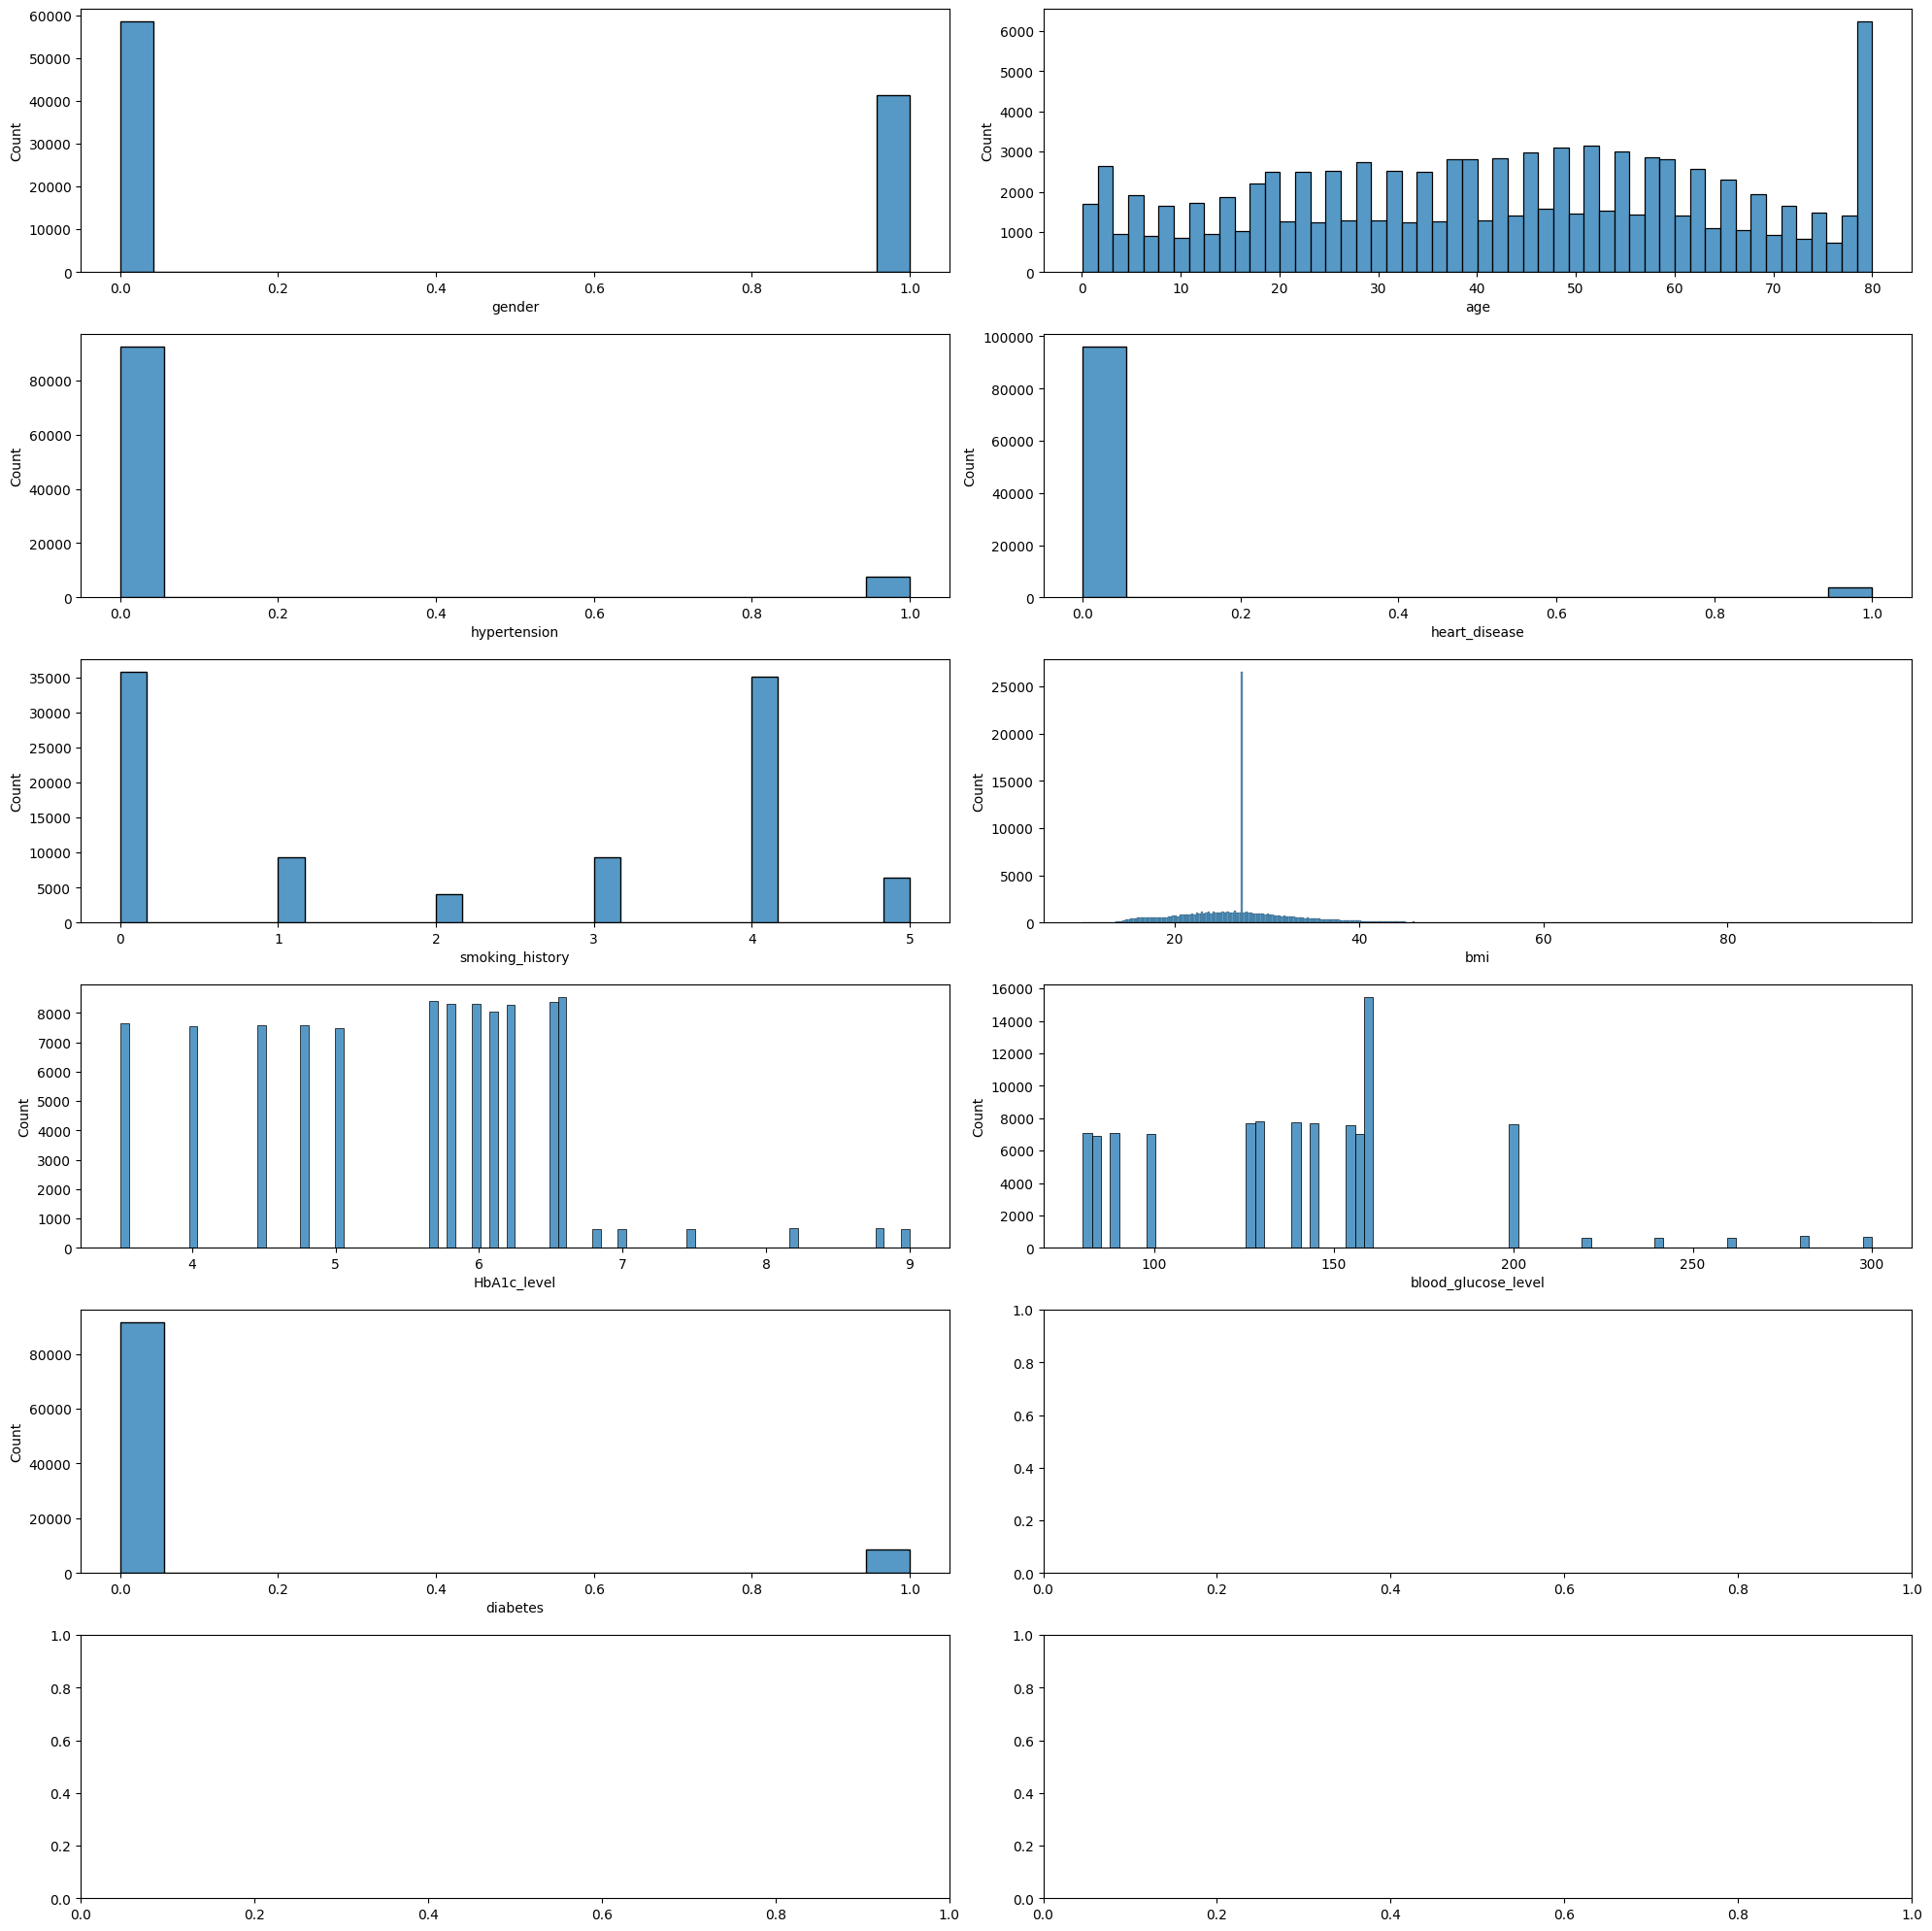

In [36]:
# Evaluating our data distrinution to determine best scaler to use
len(data.select_dtypes(include="number").columns)
fig, position = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(data.select_dtypes(include="number")):
    sns.histplot(data[column_name], ax=position[index])

plt.tight_layout()
plt.show()

#### Applying StandardScaler since our data is slightly skewed

In [37]:
# Initialize the scaler
scaler = StandardScaler()

In [38]:
# Training the model
c = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'X_train_scaled' is not defined

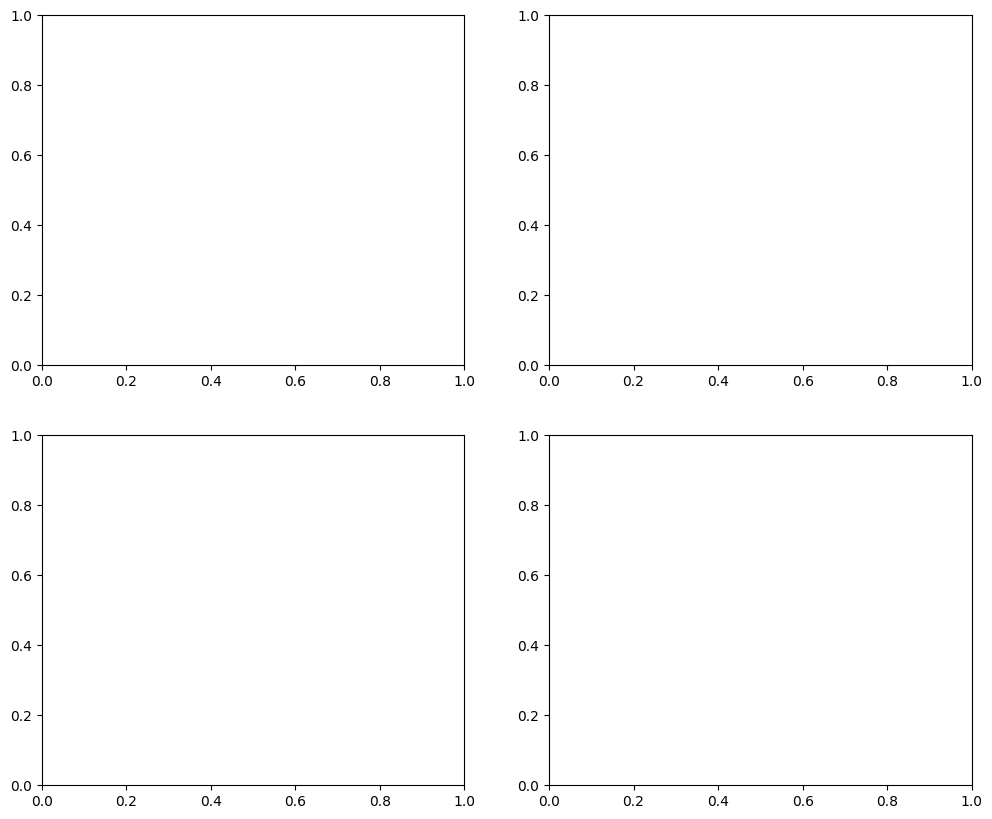

In [39]:
# Classifiers list
classifiers = [
    [LogisticRegression(random_state=42), 'Logistic Regression'],
    [RandomForestClassifier(random_state=42), 'Random Forest'],
    [GaussianNB(), 'Naive Bayes'],
    [XGBClassifier(eval_metric='mlogloss', use_label_encoder=False), 'XGBoost']
]

# To collect report data
report_table = []

# For confusion matrix plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid

for idx, (model, model_name) in enumerate(classifiers):
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    # Classification report as dict
    report_dict = classification_report(y_test, prediction, output_dict=True)
    
    # Extract only class "0", class "1", and "accuracy"
    row = {
        'Model': model_name,
        'Precision (0)': round(report_dict['0']['precision'], 2),
        'Recall (0)': round(report_dict['0']['recall'], 2),
        'F1-score (0)': round(report_dict['0']['f1-score'], 2),
        'Precision (1)': round(report_dict['1']['precision'], 2),
        'Recall (1)': round(report_dict['1']['recall'], 2),
        'F1-score (1)': round(report_dict['1']['f1-score'], 2),
        'Accuracy': round(report_dict['accuracy'], 2)
    }
    report_table.append(row)

    # Confusion matrix plot
    matrix = confusion_matrix(y_test, predictions)
    ax = axes[idx // 2, idx % 2]
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print classification report table
report_df = pd.DataFrame(report_table)
print("Classification Summary Table:")
print(report_df.to_string(index=False))


##### After using StandardScaler, all models improved and now show 97% accuracy and 70% recall for diabetic cases.Naive Bayes, which performed poorly before, now matches the top models in detecting diabetic cases.This shows that scaling the data helps models better understand and detect minority classes. However, there's still room to improve recall further using SMOTE to balance the data.

## Data Imbalance ( let use SMOTE ) to improve our dataset

#### Using SMOTE to balance our imbalance dataset by oversampling the minority(People with Diabetes) class to balnce with the majority(people without Diabetes) 

In [ ]:
# Separate features and target
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [ ]:
# Initialize the scaler
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [ ]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
print(y_resampled.value_counts()) # count of the y_resampled

print(y_resampled.value_counts(normalize=True)*100) # percentage of the y_resampled

sns.countplot(x=y_resampled); # ploting the y_resampled

#### Applying smote we have balanced the dataset for people with diabetes and people without diabetes.

### Now lets traing the model with the balance dataset.

In [ ]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
class_weights = "balanced"

# Classifiers list
classifiers = [
    [LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    [RandomForestClassifier(random_state=42,class_weight=class_weights), 'Random Forest'],
    [GaussianNB(), 'Naive Bayes'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
]

# To collect report data
report_table = []

# For confusion matrix plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid

for idx, (model, model_name) in enumerate(classifiers):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    # Classification report as dict
    report_dict = classification_report(y_test, prediction, output_dict=True)
    
    # Extract only class "0", class "1", and "accuracy"
    row = {
        'Model': model_name,
        'Precision (0)': round(report_dict['0']['precision'], 2),
        'Recall (0)': round(report_dict['0']['recall'], 2),
        'F1-score (0)': round(report_dict['0']['f1-score'], 2),
        'Precision (1)': round(report_dict['1']['precision'], 2),
        'Recall (1)': round(report_dict['1']['recall'], 2),
        'F1-score (1)': round(report_dict['1']['f1-score'], 2),
        'Accuracy': round(report_dict['accuracy'], 2)
    }
    report_table.append(row)

    # Confusion matrix plot
    matrix = confusion_matrix(y_test, predictions)
    ax = axes[idx // 2, idx % 2]
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print classification report table
report_df = pd.DataFrame(report_table)
print("Classification Summary Table:")
print(report_df.to_string(index=False))


After applying SMOTE, our model performance on people with diabetic cases improved significantly.
XGBoost and Random Forest now achieve 98% accuracy with 96–98% recall for both classes.
Logistic Regression became balanced (88% for both classes), but overall performance dropped slightly.
Naive Bayes improved but still lags behind others, making XGBoost and Random Forest the best models after SMOTE.

In [ ]:
# SAVING THE MODEL
joblib.dump(model, 'diabetes_model.joblib')